# Airline Passenger Satisfaction Analysis

## Table of Contents
1. [Project Overview](#project-overview)
2. [Data Preprocessing](#data-preprocessing)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [Feature Engineering](#feature-engineering)
5. [Model Training](#model-training)
6. [Model Evaluation](#model-evaluation)

## Project Overview
This project analyzes airline passenger satisfaction using machine learning techniques. The goal is to predict passenger satisfaction based on various flight and service-related features.

## Data Preprocessing

### Data Loading and Initial Exploration

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [199]:
df = pd.read_csv('train.csv')

## Exploratory Data Analysis

In [200]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [201]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [202]:
df.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [203]:
df.shape

(103904, 25)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### Handling Missing Values

In [205]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

We found some missing values in the `Arrival Delay in Minutes` column, which are in a very small small quantity. So, we may drop those null values entirely

In [206]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


We don't need `id`, `Unnamed: 0` columns as they will not add any values to the model prediction and its better to simply drop them

In [207]:
df.drop(columns=['id', 'Unnamed: 0'], inplace=True)

### Check for unique categorical values

In [208]:
for col in df.columns:
    if df[col].nunique() < 10:
        print(f"Unique values in column {col}")
        print(df[col].unique())

Unique values in column Gender
['Male' 'Female']
Unique values in column Customer Type
['Loyal Customer' 'disloyal Customer']
Unique values in column Type of Travel
['Personal Travel' 'Business travel']
Unique values in column Class
['Eco Plus' 'Business' 'Eco']
Unique values in column Inflight wifi service
[3 2 4 1 5 0]
Unique values in column Departure/Arrival time convenient
[4 2 5 3 1 0]
Unique values in column Ease of Online booking
[3 2 5 4 1 0]
Unique values in column Gate location
[1 3 2 5 4 0]
Unique values in column Food and drink
[5 1 2 4 3 0]
Unique values in column Online boarding
[3 5 2 1 4 0]
Unique values in column Seat comfort
[5 1 2 3 4 0]
Unique values in column Inflight entertainment
[5 1 2 3 4 0]
Unique values in column On-board service
[4 1 2 3 5 0]
Unique values in column Leg room service
[3 5 4 2 1 0]
Unique values in column Baggage handling
[4 3 5 1 2]
Unique values in column Checkin service
[4 1 3 5 2 0]
Unique values in column Inflight service
[5 4 3 1 2 0]
U

So, we found that these columns have categorical values that needs to be encoded:
- Unique values in column Gender
['Male' 'Female']
- Unique values in column Customer Type
['Loyal Customer' 'disloyal Customer']
- Unique values in column Type of Travel
['Personal Travel' 'Business travel']
- Unique values in column Class
['Eco Plus' 'Business' 'Eco']
- Unique values in column satisfaction
['neutral or dissatisfied' 'satisfied']

Here we need to encode every columns using `Label Encoding` except the `Gender` column which needs to be encoded using `One Hot` as it doesn't have any ordinal relation.

### Feature Encoding

In [209]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

cat_cols = ['Type of Travel', 'Customer Type', 'Class', 'satisfaction']
oh_col = ['Gender']

encoding_dict = {}
le = LabelEncoder()
oh = OneHotEncoder(sparse_output=False)

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    encoding_dict[col] = dict(zip(le.classes_, range(len(le.classes_))))

encoded_data = oh.fit_transform(df[oh_col])
encoded_df = pd.DataFrame(encoded_data, columns=oh.get_feature_names_out(oh_col))
final_df = pd.concat([df.drop(columns=oh_col), encoded_df], axis=1)
df.drop(columns=['Gender'], inplace=True)

print("\nEncoding Mappings:")
for col, mapping in encoding_dict.items():
    print(f"{col}: {mapping}")

print("\nFinal DataFrame:")
final_df.head()


Encoding Mappings:
Type of Travel: {'Business travel': 0, 'Personal Travel': 1}
Customer Type: {'Loyal Customer': 0, 'disloyal Customer': 1}
Class: {'Business': 0, 'Eco': 1, 'Eco Plus': 2}
satisfaction: {'neutral or dissatisfied': 0, 'satisfied': 1}

Final DataFrame:


,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male
0,0,13,1,2,460,3,4,3,1,5,...,3,4,4,5,5,25,18.0,0,0.0,1.0
1,1,25,0,0,235,3,2,3,3,1,...,5,3,1,4,1,1,6.0,0,0.0,1.0
2,0,26,0,0,1142,2,2,2,2,5,...,3,4,4,4,5,0,0.0,1,1.0,0.0
3,0,25,0,0,562,2,5,5,5,2,...,5,3,1,4,2,11,9.0,0,1.0,0.0
4,0,61,0,0,214,3,3,3,3,4,...,4,4,3,3,3,0,0.0,1,0.0,1.0


## Exploratory Data Analysis

### Visualization Techniques

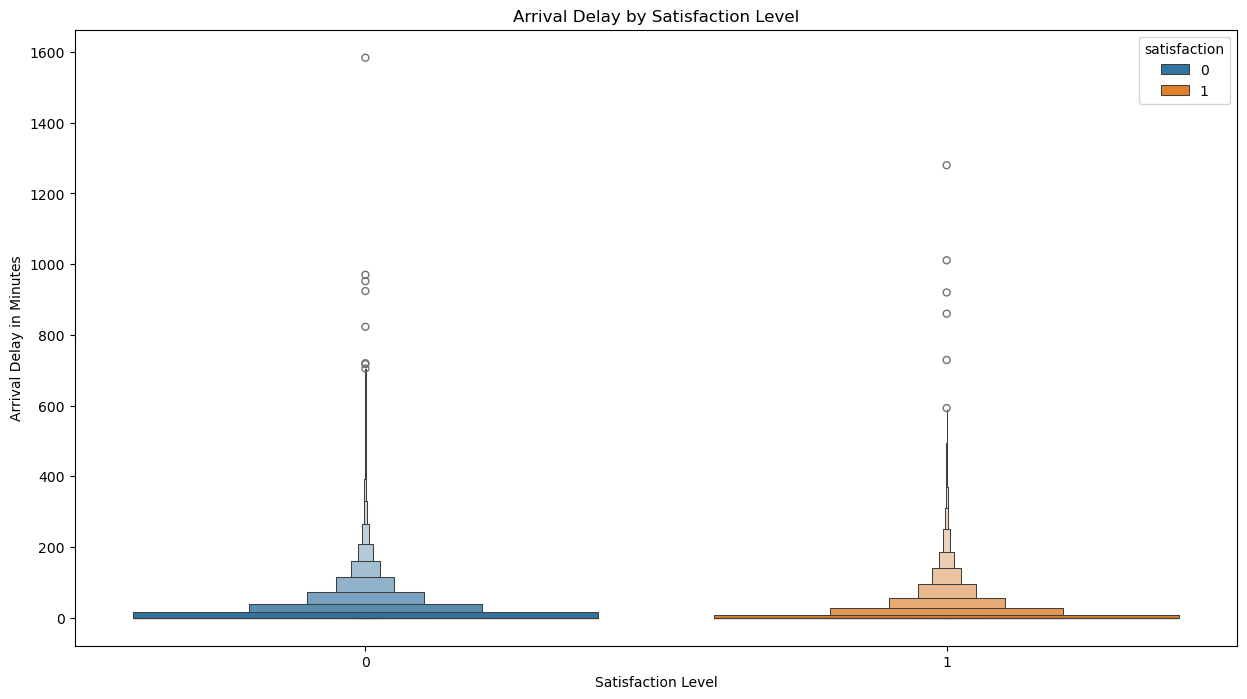

In [210]:
plt.figure(figsize=(15, 8)) 
sns.boxenplot(y=df['Arrival Delay in Minutes'], x=df['satisfaction'], hue=df['satisfaction'])
plt.title('Arrival Delay by Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Arrival Delay in Minutes')
plt.show()

In [1]:
plt.figure(figsize=(15, 8)) 
sns.boxenplot(y=df['Departure Delay in Minutes'], x=df['satisfaction'], hue=df['satisfaction'])
plt.title('Departure Delay by Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Departure Delay in Minutes')
plt.show()

NameError: name 'plt' is not defined

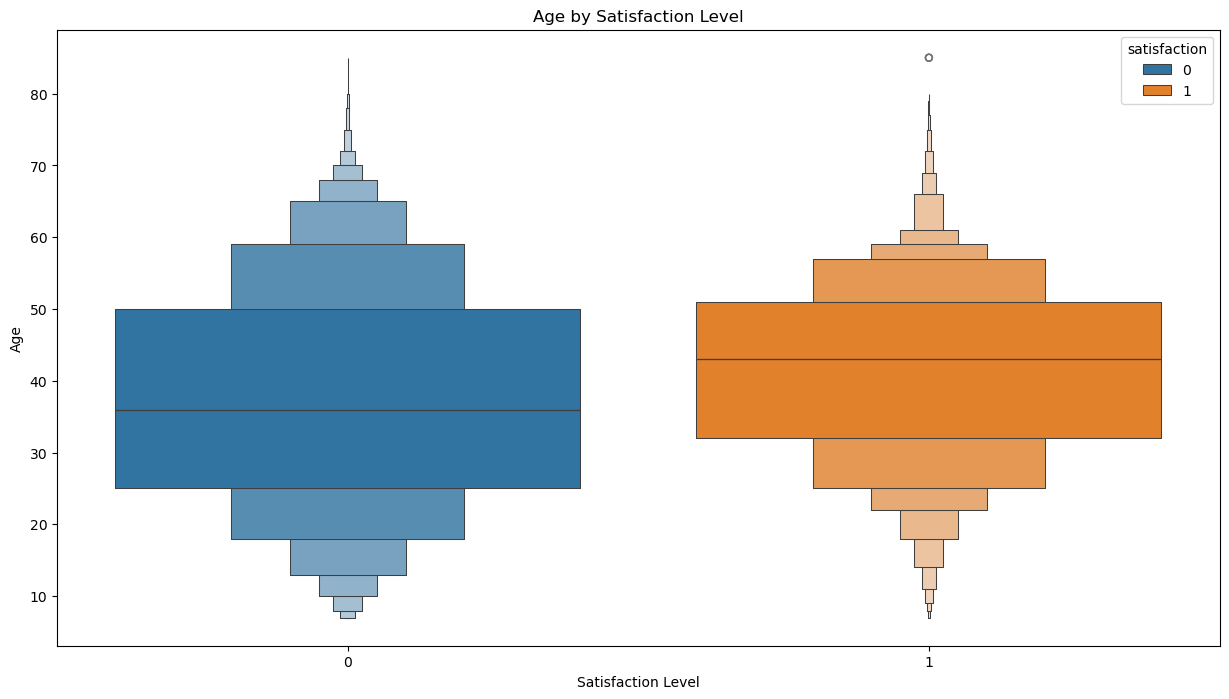

In [212]:
plt.figure(figsize=(15, 8)) 
sns.boxenplot(y=df['Age'], x=df['satisfaction'], hue=df['satisfaction'])
plt.title('Age by Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Age')
plt.show()

In [213]:
features = df[['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age', 'satisfaction']]

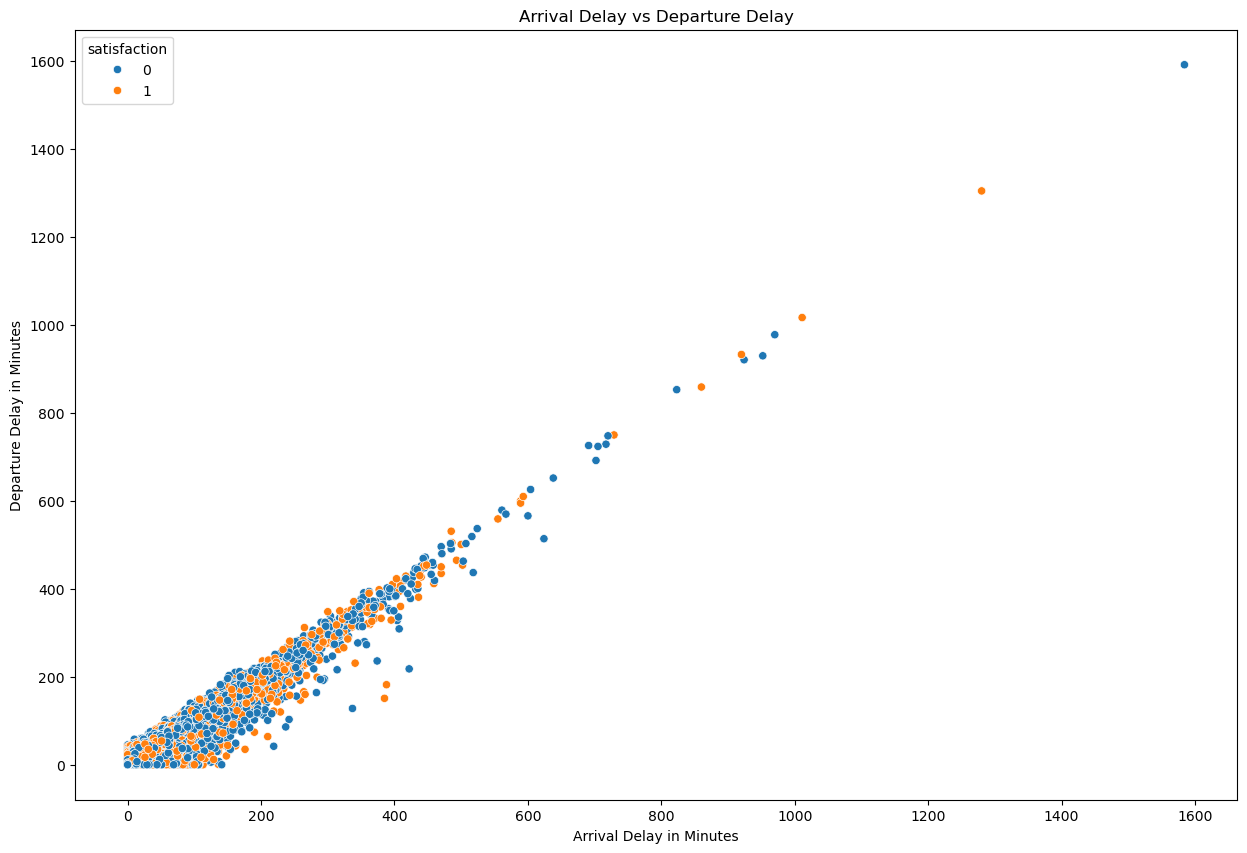

In [214]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=features, x='Arrival Delay in Minutes', y='Departure Delay in Minutes', hue='satisfaction')
plt.title('Arrival Delay vs Departure Delay')
plt.show()

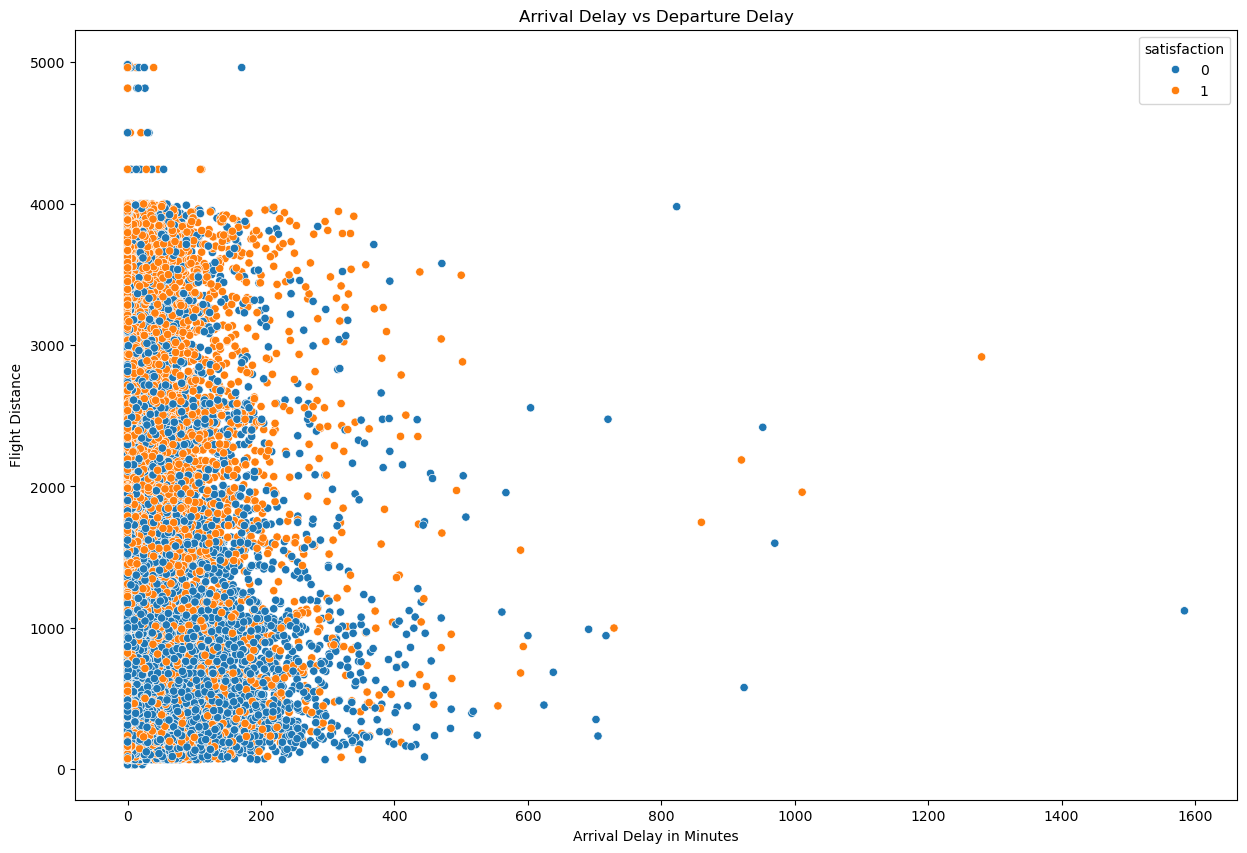

In [215]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=features, x='Arrival Delay in Minutes', y='Flight Distance', hue='satisfaction')
plt.title('Arrival Delay vs Departure Delay')
plt.show()

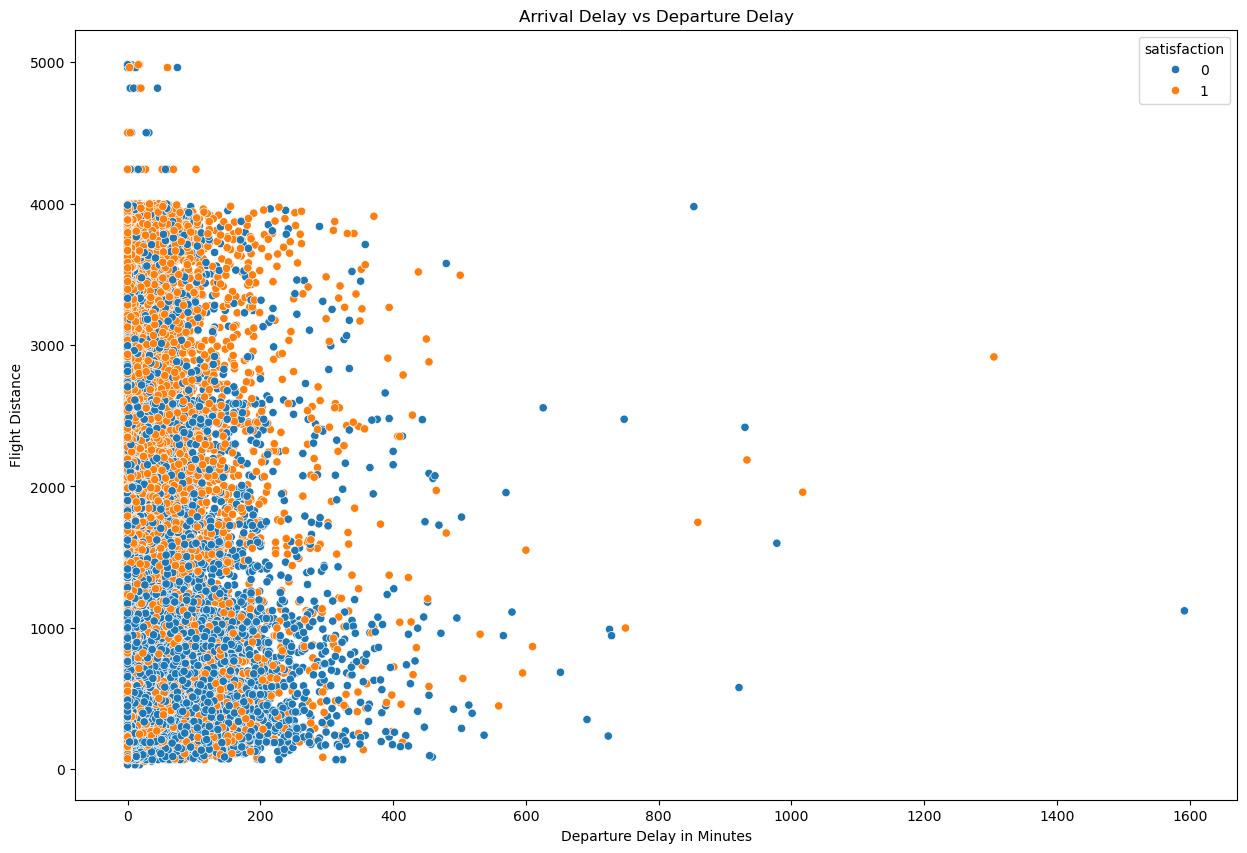

In [216]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=features, x='Departure Delay in Minutes', y='Flight Distance', hue='satisfaction')
plt.title('Arrival Delay vs Departure Delay')
plt.show()

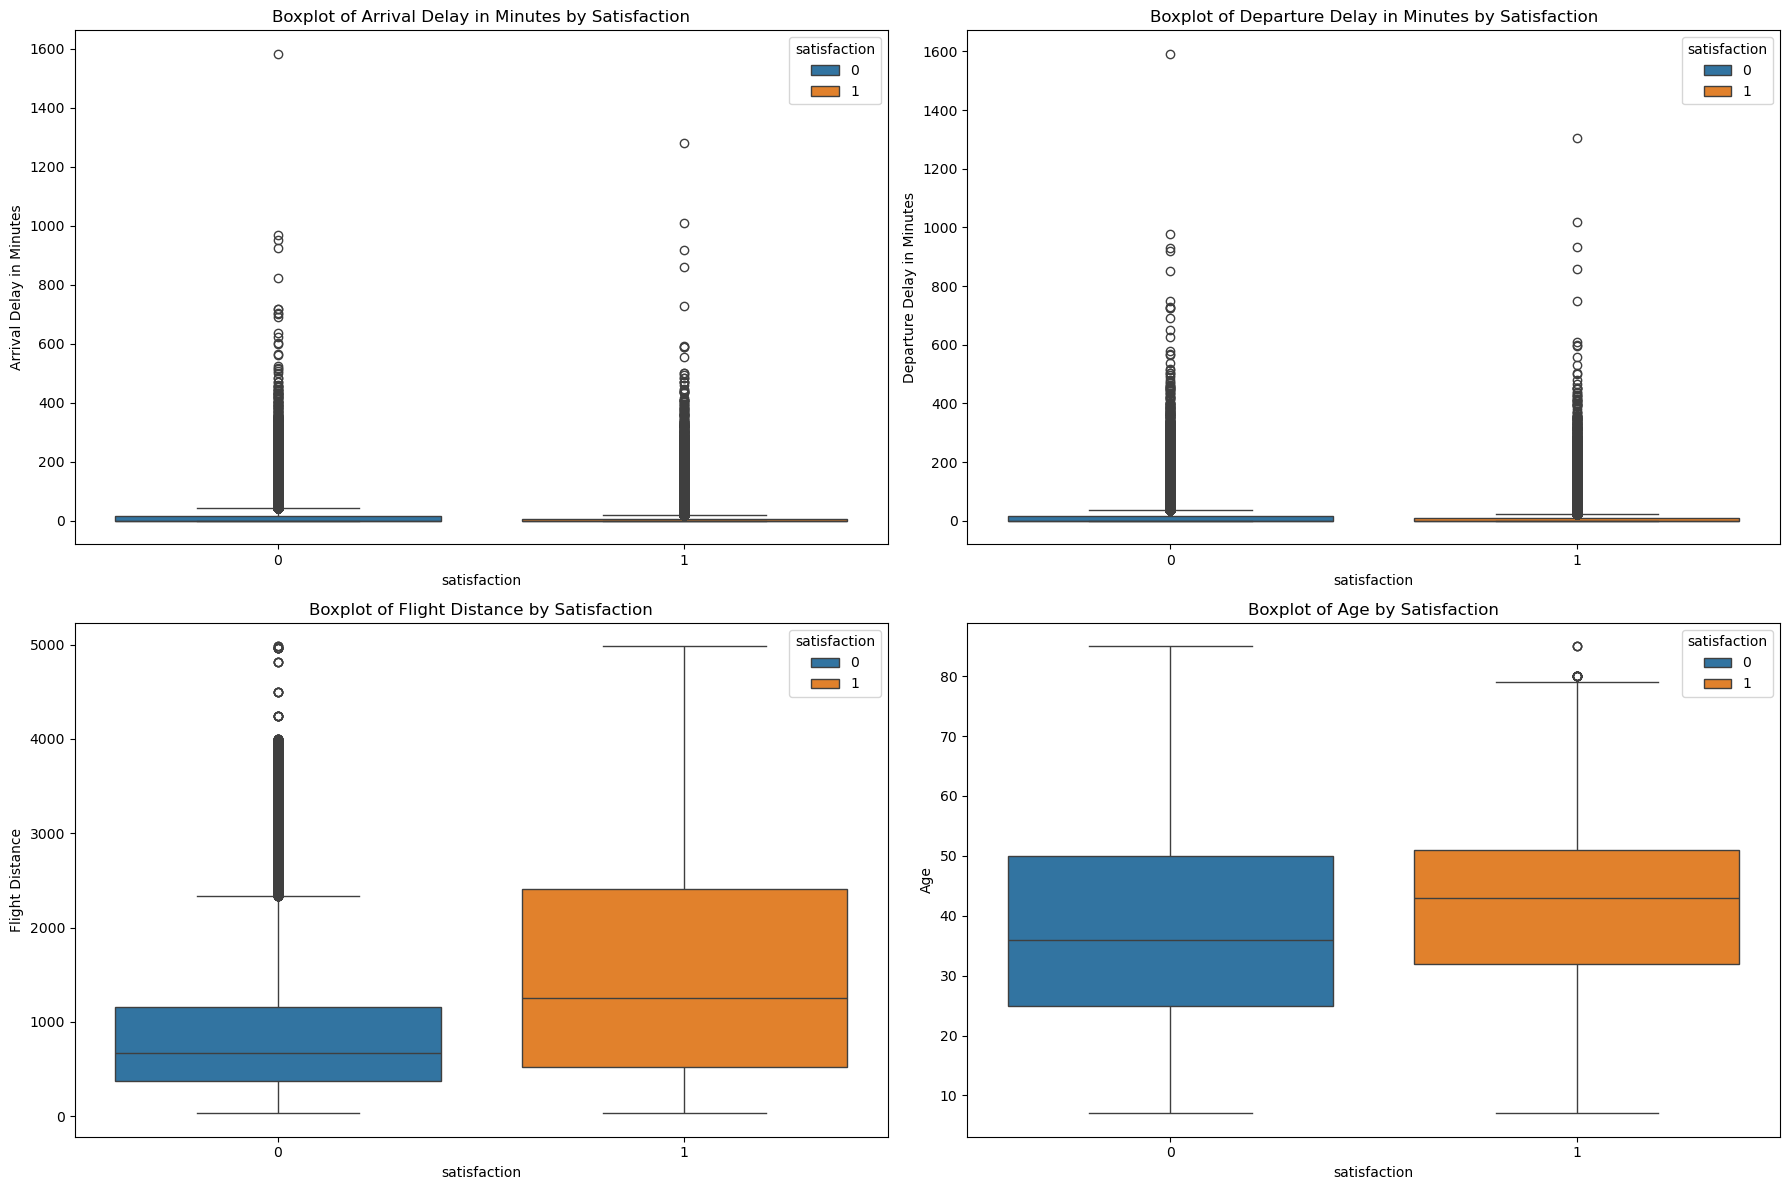

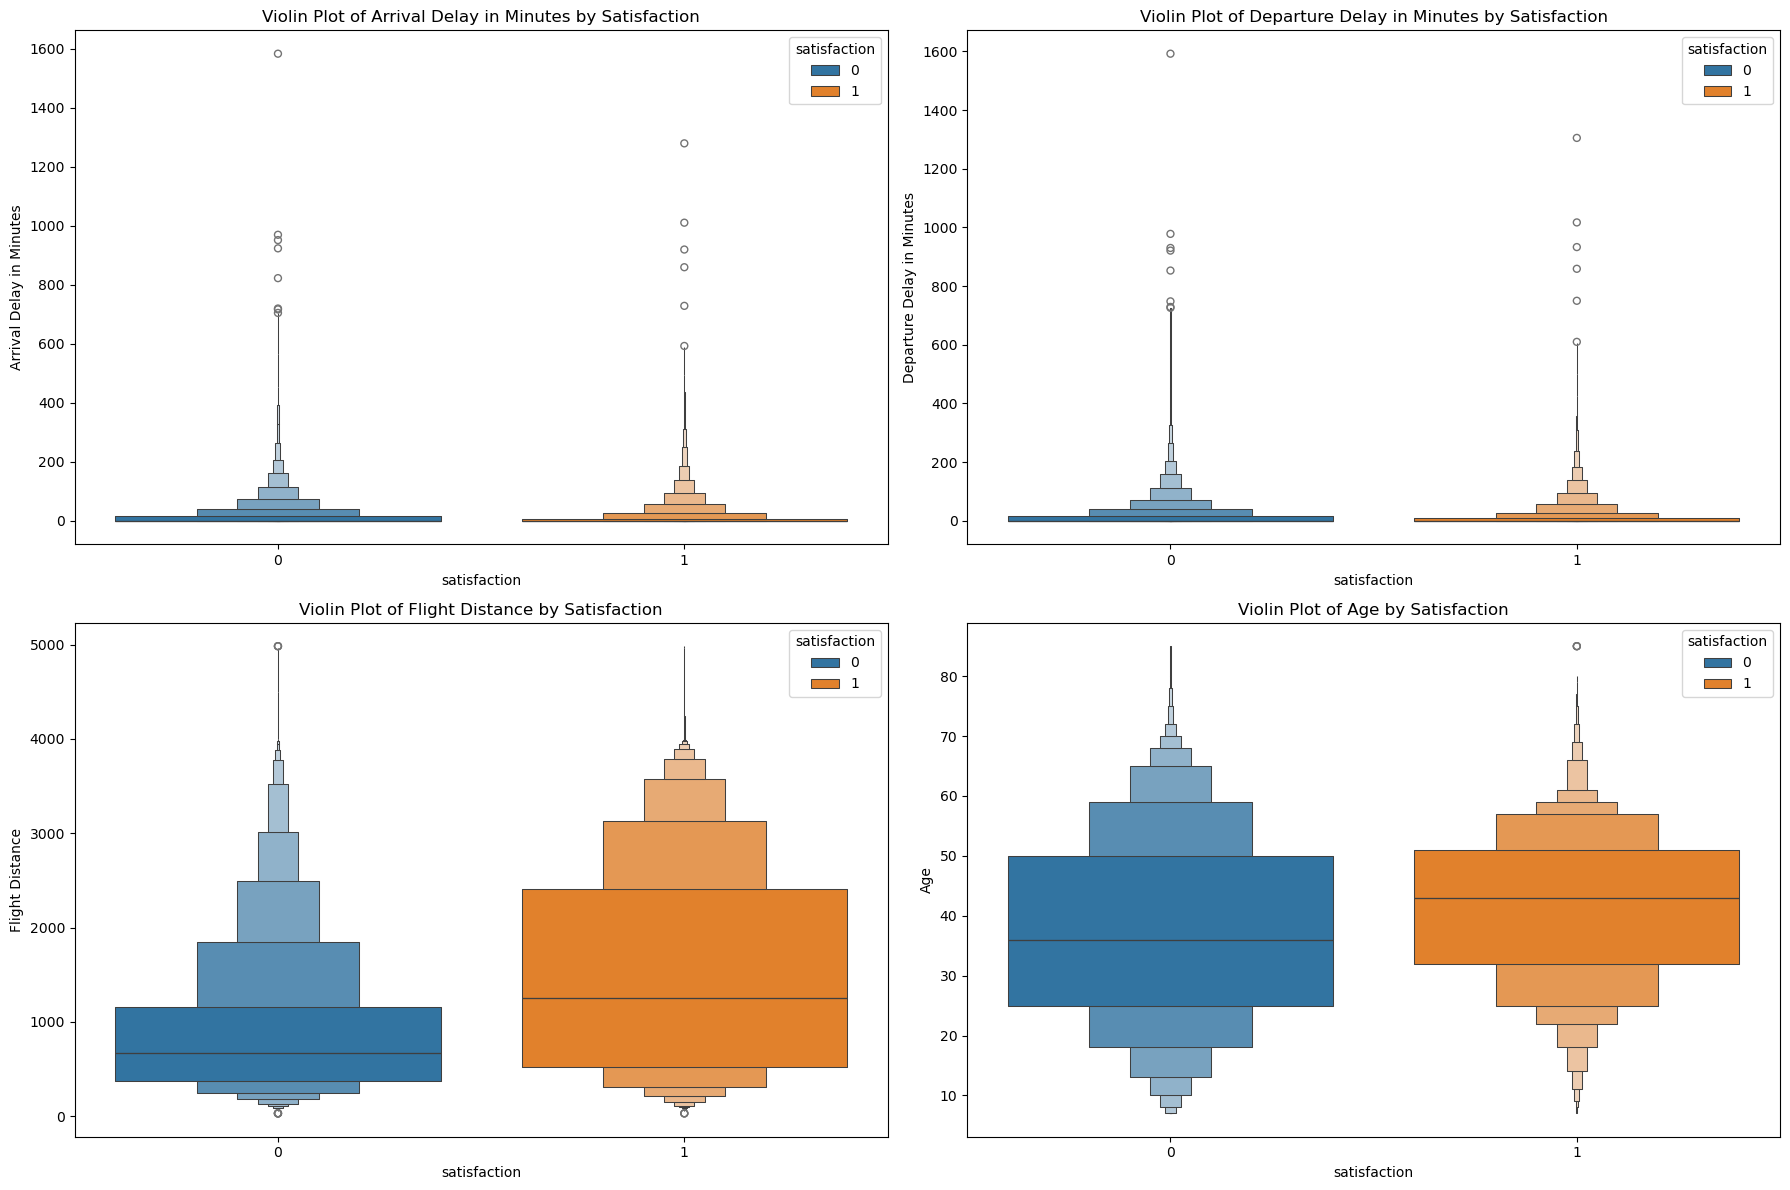

In [217]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='satisfaction', y=column, data=features, hue='satisfaction')
    plt.title(f'Boxplot of {column} by Satisfaction')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 12))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxenplot(x='satisfaction', y=column, data=features, hue='satisfaction')
    plt.title(f'Violin Plot of {column} by Satisfaction')
plt.tight_layout()
plt.show()


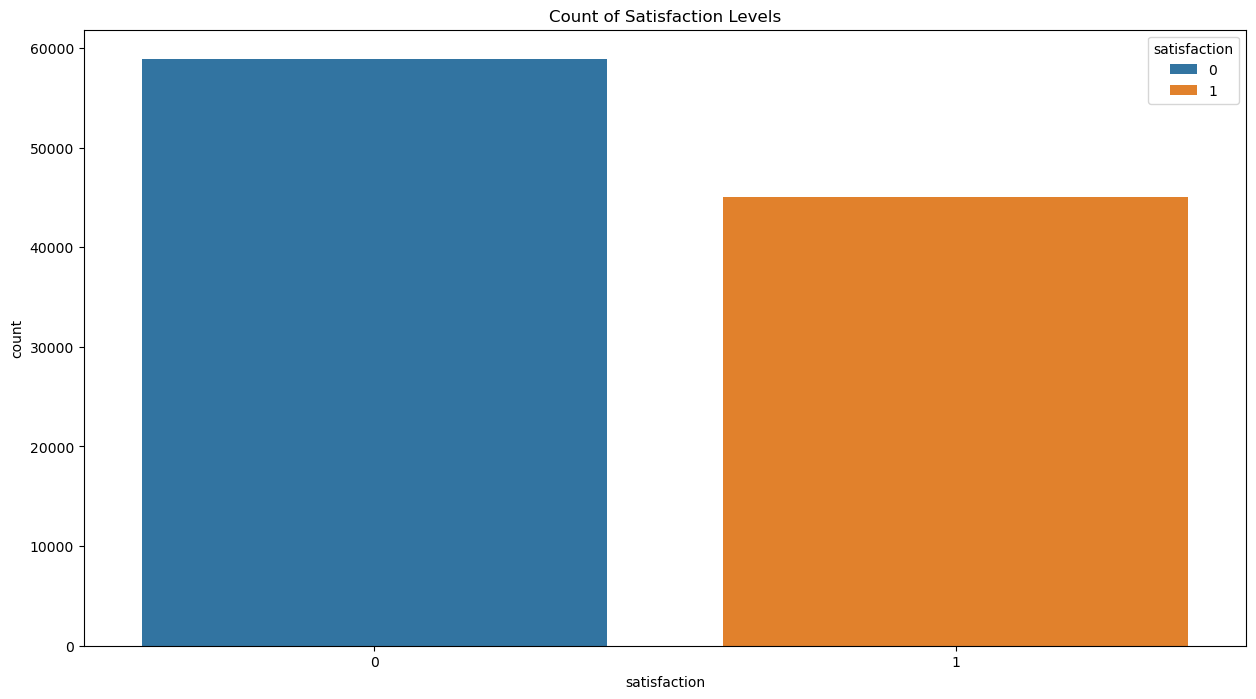

In [218]:
plt.figure(figsize=(15, 8))
sns.countplot(x='satisfaction', data=features, hue='satisfaction')
plt.title('Count of Satisfaction Levels')
plt.show()


The target column isn't very imbalanced, so no need to use `SMOTE` or `ADASYN` or others

Missing Values:
 Arrival Delay in Minutes      310
Departure Delay in Minutes      0
Flight Distance                 0
Age                             0
satisfaction                    0
dtype: int64


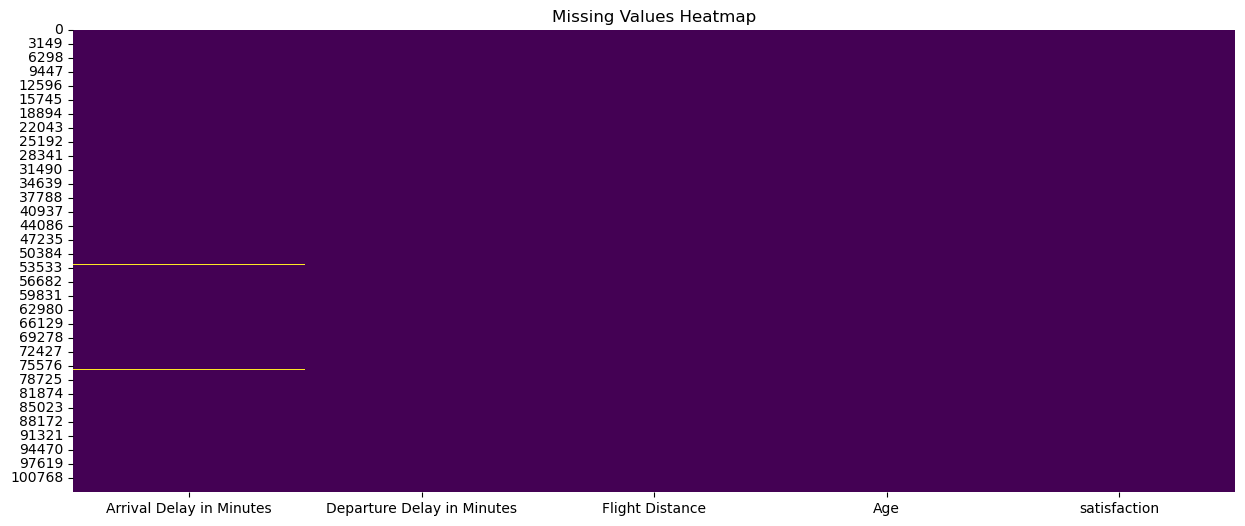

In [219]:
missing_values = features.isnull().sum()
print("Missing Values:\n", missing_values)

plt.figure(figsize=(15, 6))
sns.heatmap(features.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

This confirms the positions and spread of null values in the `Arrival Delay in Minutes`. So, we'll drop them entirely.

### Distribution Analysis


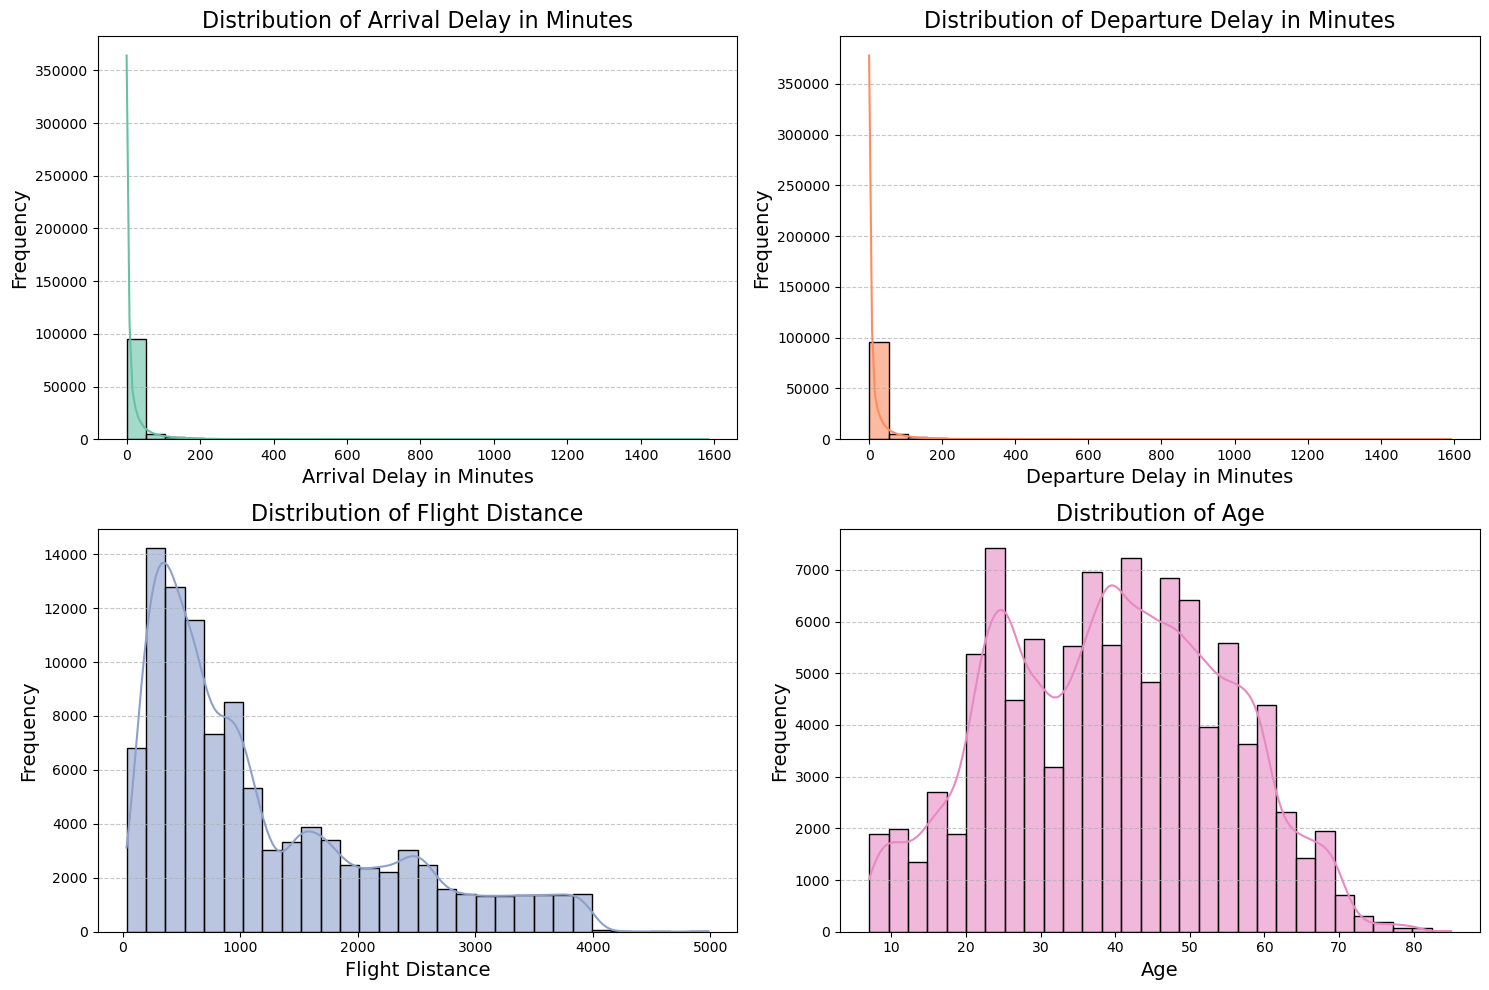

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("Set2", n_colors=len(features.columns)-1)

plt.figure(figsize=(15, 10))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(features[column], kde=True, bins=30, color=palette[i-1], alpha=0.6)
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


The `Arrival Delay in Minutes`, `Departure Delay in Minutes` & `Flight Distance` columns are skewed. So we'll use log transformation in these cases.

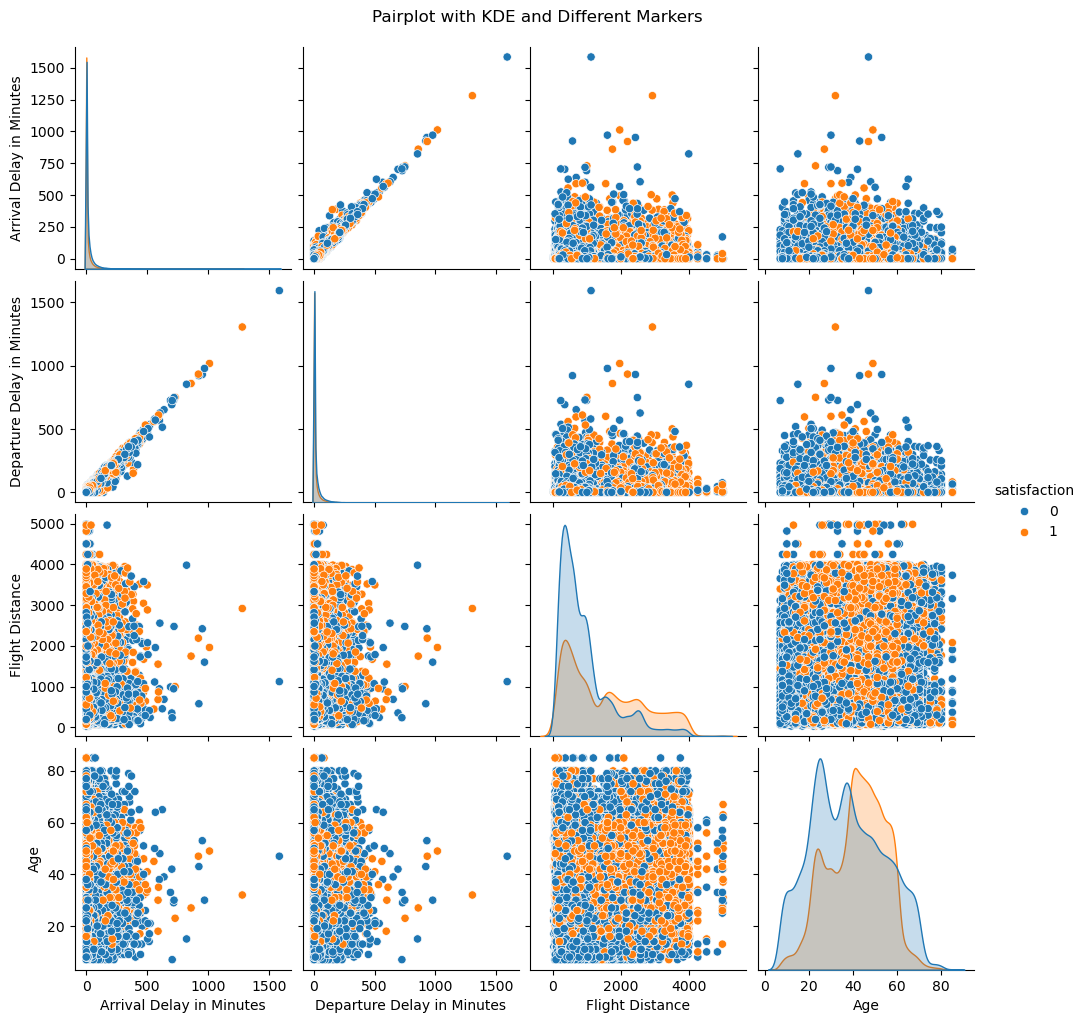

In [221]:
# Pairplot with different kinds of plots
sns.pairplot(features, hue='satisfaction', diag_kind='kde', markers=["o", "o"])
plt.suptitle('Pairplot with KDE and Different Markers', y=1.02)
plt.show()


### Outlier Detection

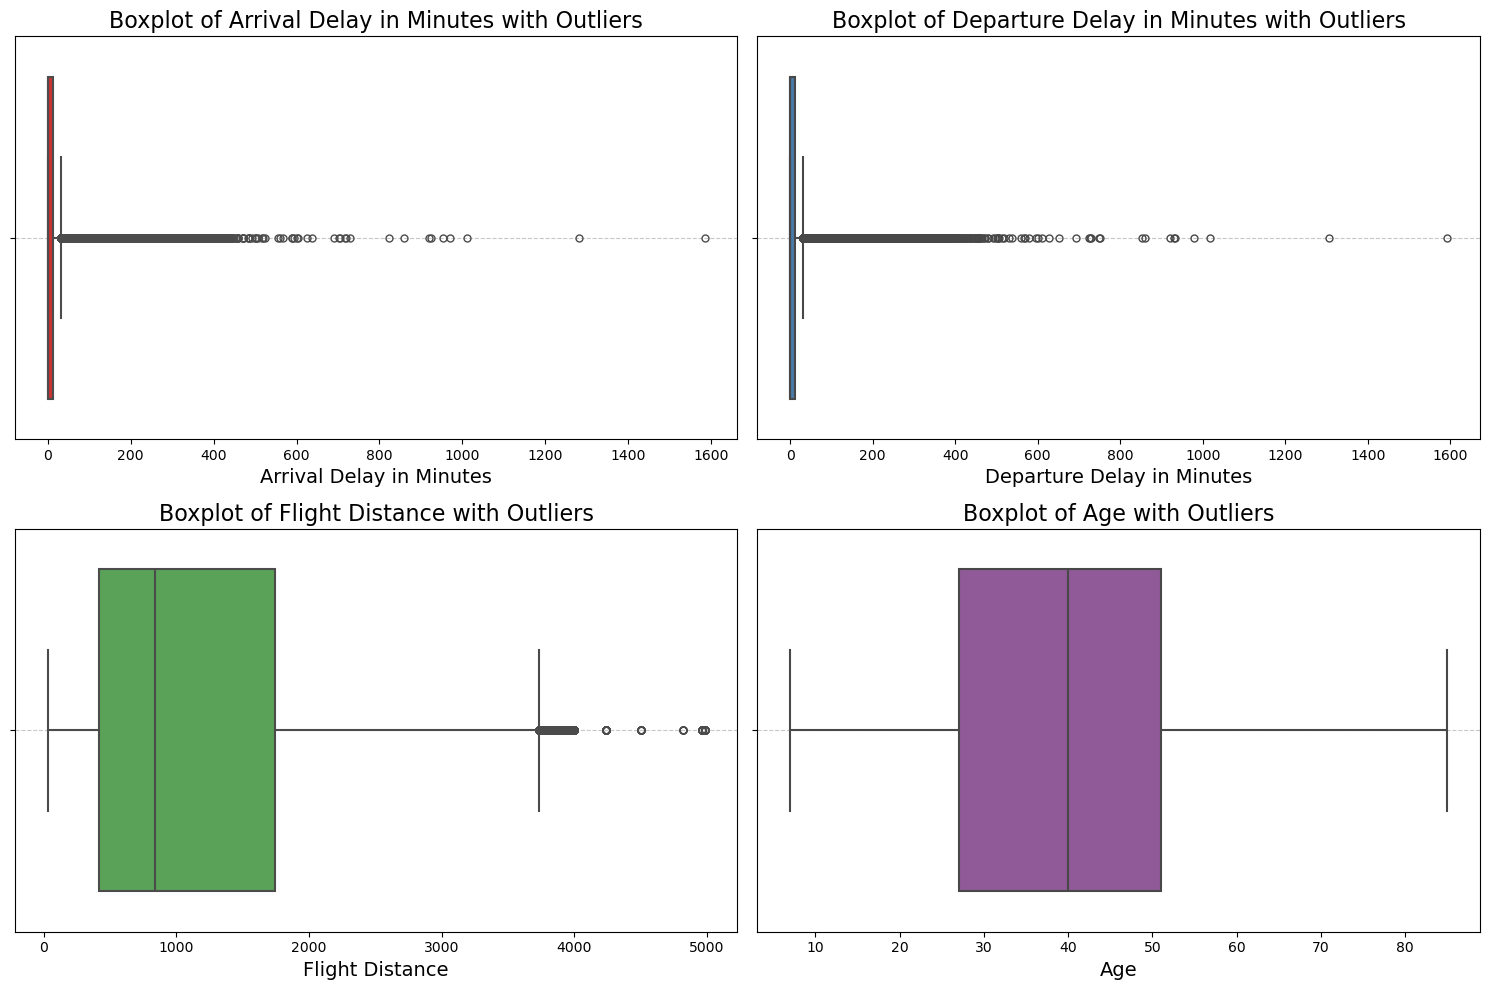

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("Set1", n_colors=len(features.columns)-1)

Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))

plt.figure(figsize=(15, 10))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=features[column], color=palette[i-1], fliersize=5, linewidth=1.5)
    plt.title(f'Boxplot of {column} with Outliers', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Combined analysis

In [ ]:
# features = df[['Class', 'Type of Travel', 'Seat comfort', 'Inflight entertainment', 'Online boarding', 'Customer Type', 'Inflight wifi service', 'satisfaction']]

# sns.pairplot(features, hue='satisfaction')

In [224]:
# features = df[['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age', 'satisfaction']]

# sns.pairplot(features, hue='satisfaction')

### Correlation Matrix

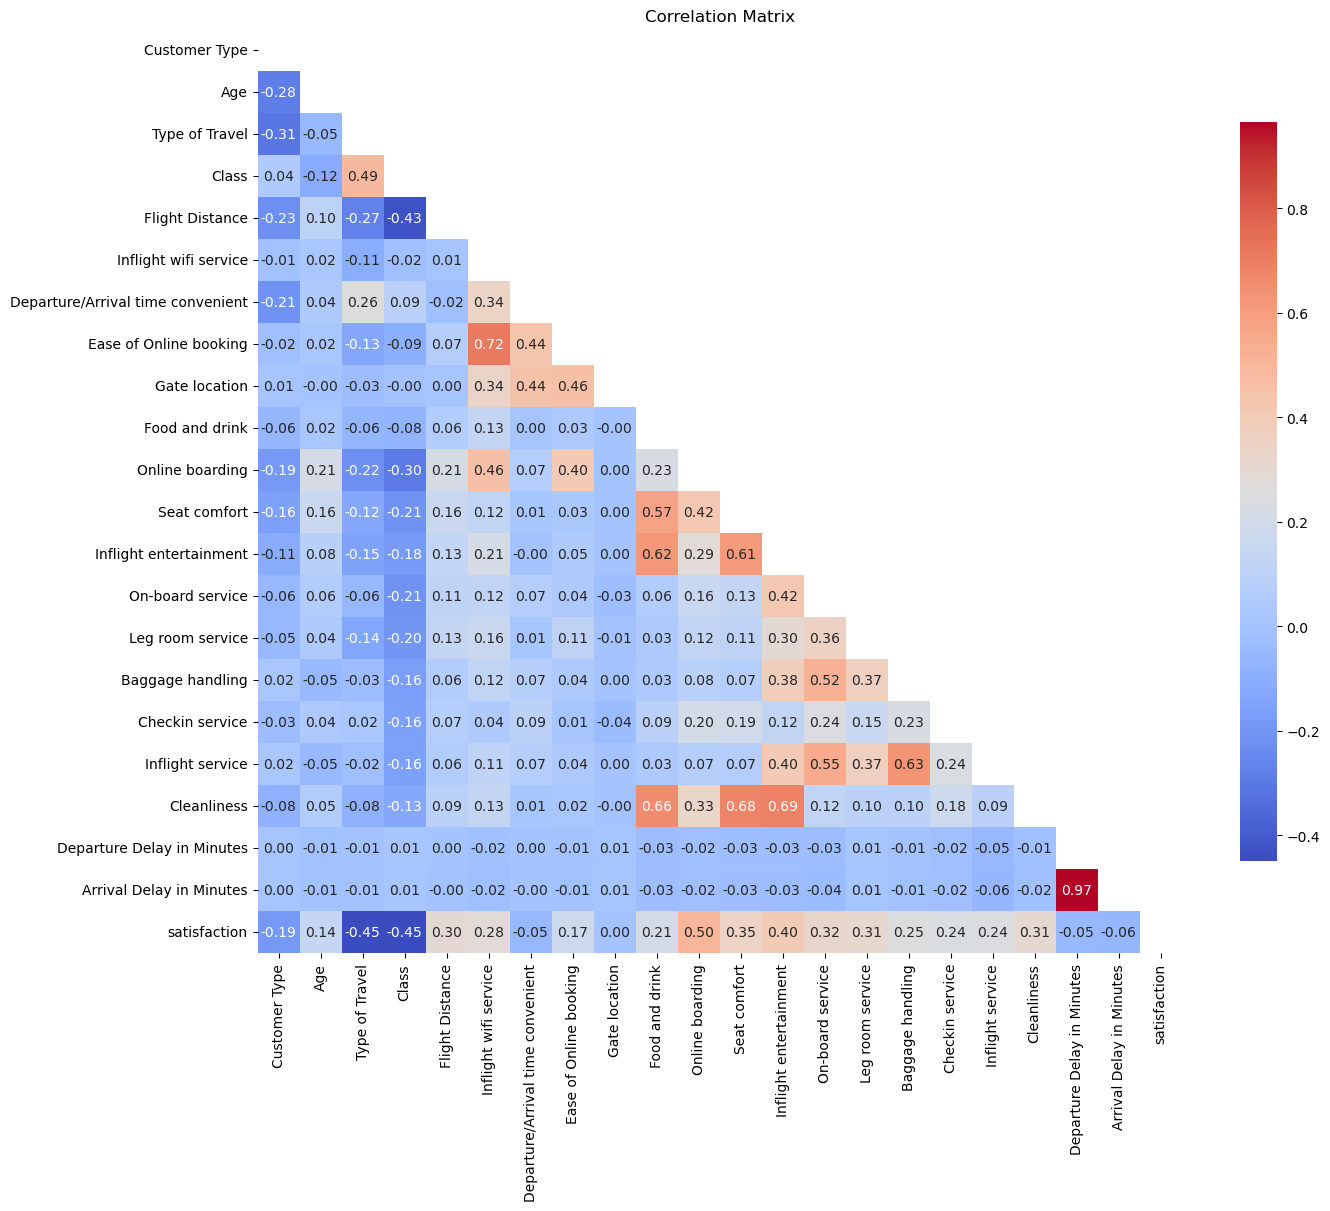

In [225]:
df = df[[col for col in df.columns if col != 'satisfaction'] + ['satisfaction']]

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 12))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

We can clearly see some highly correlated columns.
- The `Class` and `Type of Travel` column have high negative correlations with the target `satisfaction` column
- The `Online boarding`, `Seat comfort

### Drop all missing rows

In [226]:
df.dropna(axis=0, inplace=True)

In [227]:
df.isnull().sum()

Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Outlier Handling


### Skewness Transformation

In [228]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
skewed_cols = df[numerical_cols].apply(lambda x: x.skew()).abs()
skewed_cols = skewed_cols[skewed_cols > 0.5].index

def transform_skewed(df, method="log"):
    df_transformed = df.copy()
    
    for col in skewed_cols:
        if method == "log":
            df_transformed[col] = np.log1p(df_transformed[col])
        elif method == "sqrt":
            df_transformed[col] = np.sqrt(df_transformed[col])
        elif method == "boxcox":
            from scipy.stats import boxcox
            df_transformed[col], _ = boxcox(df_transformed[col] + 1)
    
    return df_transformed

df = transform_skewed(df, method="log")

## Feature Engineering


In [ ]:
def get_high_correlation_features(df, target, threshold=0.5):
    corr_matrix = df.corr()
    high_corr_features = []

    target_corr = corr_matrix[target].drop(target)
    selected_features = target_corr[abs(target_corr) > threshold].index.tolist()
    
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2 and abs(corr_matrix[col1][col2]) > threshold:
                high_corr_features.append((col1, col2))
    
    return selected_features, high_corr_features

selected_features, feature_pairs = get_high_correlation_features(df, target="satisfaction", threshold=0.35)

In [230]:
from itertools import combinations

columns = selected_features

for feature1, feature2 in combinations(columns, 2):
    interaction_feature_name = f"{feature1}_x_{feature2}"
    df[interaction_feature_name] = df[feature1] * df[feature2]

In [231]:
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

In [232]:
def remove_high_collinearity(df, threshold=0.90):
    correlation_matrix = df.corr().abs()
    
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    df_reduced = df.drop(columns=to_drop)
    
    return df_reduced


In [233]:
def remove_collinearity_with_target(df, target_col, threshold=0.90):
    X = df.drop(columns=[target_col])
    target_corr = abs(X.corrwith(df[target_col]))
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = []
    
    for col in upper.columns:
        correlated_features = upper[col][upper[col] > threshold].index
        for feat in correlated_features:
            if target_corr[col] < target_corr[feat]:
                to_drop.append(col)
                break
    
    return df.drop(columns=to_drop)

In [234]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def create_polynomial_features(X, degree=2, interaction_only=False):
    poly = PolynomialFeatures(degree=degree, interaction_only=interaction_only)
    X_poly = poly.fit_transform(X)
    
    feature_names = poly.get_feature_names_out(X.columns)
    X_poly_df = pd.DataFrame(X_poly, columns=feature_names)
    
    X_poly_df = X_poly_df.drop(columns=['1'])
    
    scaler = StandardScaler()
    X_poly_scaled = scaler.fit_transform(X_poly_df)
    X_poly_scaled_df = pd.DataFrame(X_poly_scaled, columns=X_poly_df.columns)
    
    return X_poly_scaled_df

# X_polynomial = create_polynomial_features(X, degree=2, interaction_only=False)
X = remove_high_collinearity(X, 0.85)

In [235]:
X.shape

(103594, 24)

## Model Training

### Model Selection


In [ ]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cb_params = {'iterations': 476, 'learning_rate': 0.043757186100119284, 'depth': 10, 'l2_leaf_reg': 3.398402305277832}
lgbm_params = {'n_estimators': 322, 'learning_rate': 0.045988672721624185, 'max_depth': 14, 'num_leaves': 75, 'min_child_samples': 74, 'subsample': 0.688931554623341, 'colsample_bytree': 0.7371398540523763}
rf_params = {'n_estimators': 355, 'max_depth': 15, 'min_samples_split': 6, 'max_features': 'sqrt', 'criterion': 'entropy'}
xgb_params = {'max_depth': 15, 'learning_rate': 0.02270892971085817, 'min_child_weight': 1.4634453655046655, 'subsample': 0.9411317654956244, 'colsample_bytree': 0.9217563542510374, 'gamma': 2.061375285385118, 'n_estimators': 345}
models = {
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(random_seed=42, verbose=False)
}


## Model Evaluation


### Performance Metrics


In [242]:
predictions = {}
for name, model in models.items():
    print(f"\n{'-'*50}")
    print(f"{name} Results:")
    model.fit(X_train, y_train)
    
    predictions[name] = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, predictions[name]):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, predictions[name]):.4f}")
    print(f"R2 Score: {r2_score(y_test, predictions[name]):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, predictions[name], digits=3))


--------------------------------------------------
XGBoost Results:
Accuracy: 0.9644
ROC AUC: 0.9622
R2 Score: 0.8555

Classification Report:
              precision    recall  f1-score   support

           0      0.957     0.980     0.969     11655
           1      0.974     0.944     0.959      9064

    accuracy                          0.964     20719
   macro avg      0.966     0.962     0.964     20719
weighted avg      0.965     0.964     0.964     20719


--------------------------------------------------
Random Forest Results:
Accuracy: 0.9583
ROC AUC: 0.9557
R2 Score: 0.8304

Classification Report:
              precision    recall  f1-score   support

           0      0.951     0.976     0.963     11655
           1      0.968     0.935     0.951      9064

    accuracy                          0.958     20719
   macro avg      0.960     0.956     0.957     20719
weighted avg      0.959     0.958     0.958     20719


--------------------------------------------------
Li

```
Random Forest Results:
Accuracy: 0.9622
ROC AUC: 0.9596
R2 Score: 0.8462

Classification Report:
              precision    recall  f1-score   support

           0      0.954     0.980     0.967     11655
           1      0.974     0.939     0.956      9064

    accuracy                          0.962     20719
   macro avg      0.964     0.960     0.961     20719
weighted avg      0.962     0.962     0.962     20719

In [243]:
models_comparison = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy': [accuracy_score(y_test, predictions[model]) for model in models.keys()],
    'ROC AUC': [roc_auc_score(y_test, predictions[model]) for model in models.keys()],
    'R2 score': [r2_score(y_test, predictions[model]) for model in models.keys()]
})
models_comparison = models_comparison.sort_values('Accuracy', ascending=False)

print("\n" + "="*50)
print("Models Comparison:")
print(models_comparison.to_string(index=False))


Models Comparison:
        Model  Accuracy  ROC AUC  R2 score
     LightGBM  0.964670 0.961889  0.856435
     CatBoost  0.964622 0.962325  0.856239
      XGBoost  0.964429 0.962153  0.855455
Random Forest  0.958251 0.955717  0.830350


``` Models Comparison:
        Model  Accuracy  ROC AUC  R2 score
     LightGBM  0.967228 0.964617  0.866830
      XGBoost  0.964911 0.962435  0.857416
     CatBoost  0.964236 0.961895  0.854670
Random Forest  0.959747 0.957109  0.836430

```
        Model  Accuracy  ROC AUC  R2 score
     LightGBM  0.964670 0.961889  0.856435
     CatBoost  0.964622 0.962325  0.856239
      XGBoost  0.964429 0.962153  0.855455
Random Forest  0.962160 0.959560  0.846237

Cross-Validation Results:
Accuracy: 0.9658 ± 0.0010
Precision: 0.9775 ± 0.0007
Recall: 0.9428 ± 0.0023
F1 Score: 0.9598 ± 0.0012
ROC AUC: 0.9955 ± 0.0003
Log Loss: 0.0837 ± 0.0018
R2 score: 0.8607 ± 0.0040


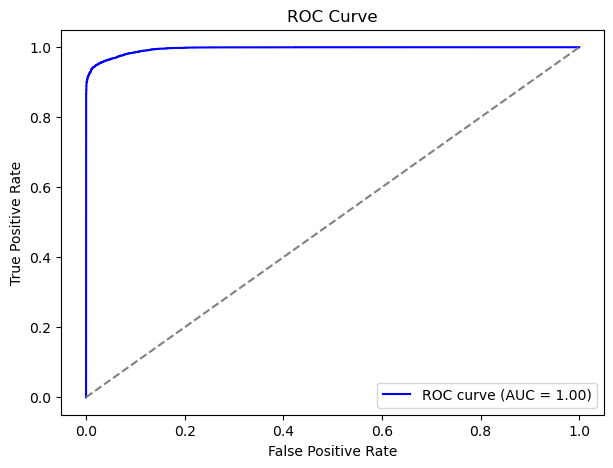

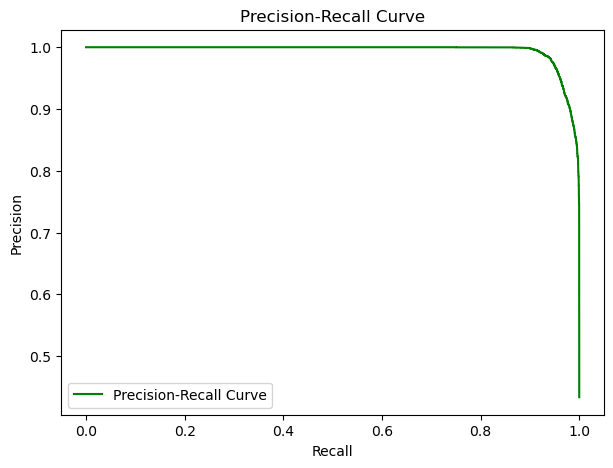

In [239]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, 
                             classification_report, roc_curve, precision_recall_curve)
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

params = {'max_depth': 15, 'learning_rate': 0.010455610252596594, 'min_child_weight': 1.3175484558283062, 'subsample': 0.9425350291622379, 'colsample_bytree': 0.7829601867423397, 'gamma': 3.320649090124465, 'n_estimators': 802}

model = XGBClassifier(**params)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_list, precision_list, recall_list, f1_list, roc_auc_list, logloss_list, r2_list = [], [], [], [], [], [], []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba > 0.5).astype(int)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))
    roc_auc_list.append(roc_auc_score(y_test, y_pred_proba))
    logloss_list.append(log_loss(y_test, y_pred_proba))
    r2_list.append(r2_score(y_test, y_pred))

print("Cross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.4f}")
print(f"Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.4f}")
print(f"Recall: {np.mean(recall_list):.4f} ± {np.std(recall_list):.4f}")
print(f"F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.4f}")
print(f"ROC AUC: {np.mean(roc_auc_list):.4f} ± {np.std(roc_auc_list):.4f}")
print(f"Log Loss: {np.mean(logloss_list):.4f} ± {np.std(logloss_list):.4f}")
print(f"R2 score: {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_list[-1]:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label='Precision-Recall Curve', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

```CatBoost Best Params: {'iterations': 476, 'learning_rate': 0.043757186100119284, 'depth': 10, 'l2_leaf_reg': 3.398402305277832}
LightGBM Best Params: {'n_estimators': 322, 'learning_rate': 0.045988672721624185, 'max_depth': 14, 'num_leaves': 75, 'min_child_samples': 74, 'subsample': 0.688931554623341, 'colsample_bytree': 0.7371398540523763}
Random Forest Best Params: {'n_estimators': 355, 'max_depth': 15, 'min_samples_split': 6, 'max_features': 'sqrt', 'criterion': 'entropy'}
XGBoost Best Params = {'max_depth': 15, 'learning_rate': 0.02270892971085817, 'min_child_weight': 1.4634453655046655, 'subsample': 0.9411317654956244, 'colsample_bytree': 0.9217563542510374, 'gamma': 2.061375285385118, 'n_estimators': 345}
